In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score
import graphviz
from sklearn import tree

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


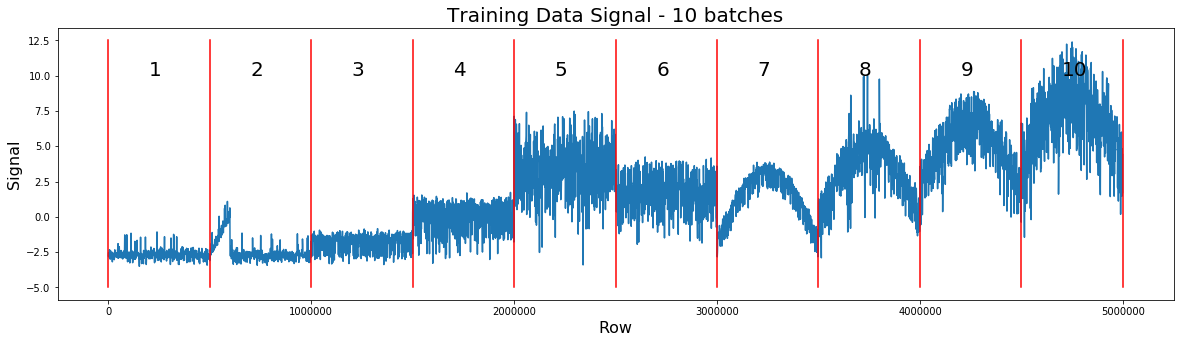

In [4]:
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train.shape[0],res),train.signal[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Row',size=16); plt.ylabel('Signal',size=16); 
plt.title('Training Data Signal - 10 batches',size=20)
plt.show()

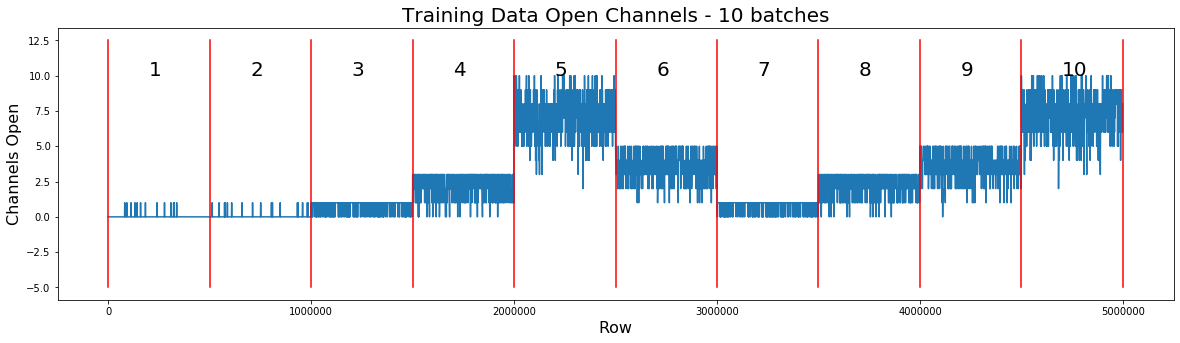

In [5]:
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train.shape[0],res),train.open_channels[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Row',size=16); plt.ylabel('Channels Open',size=16); 
plt.title('Training Data Open Channels - 10 batches',size=20)
plt.show()

#########################
### Random 1567526 to 1572526
#########################


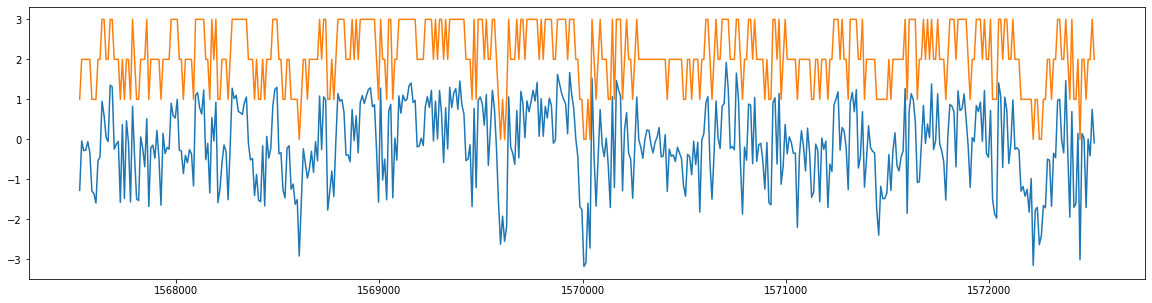

#########################
### Random 449520 to 454520
#########################


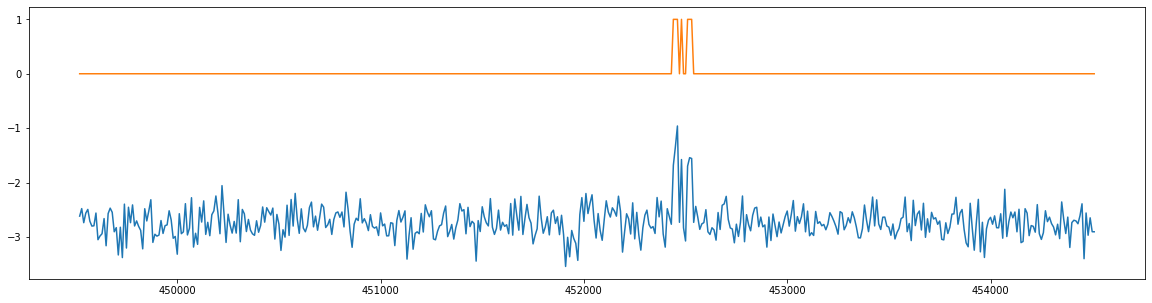

#########################
### Random 2896978 to 2901978
#########################


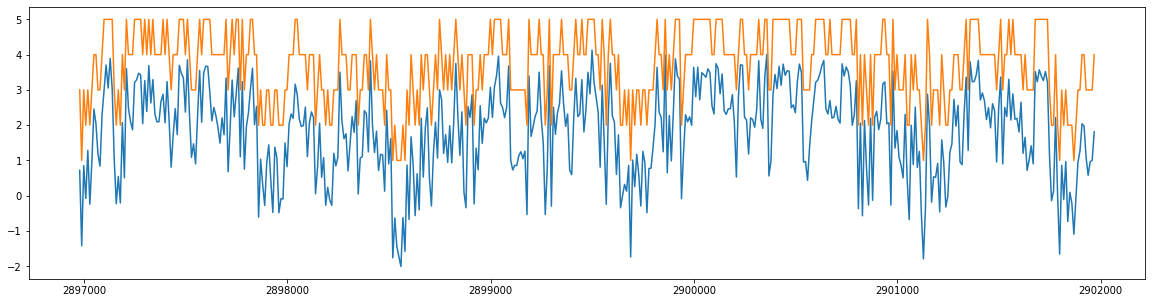

#########################
### Random 3242136 to 3247136
#########################


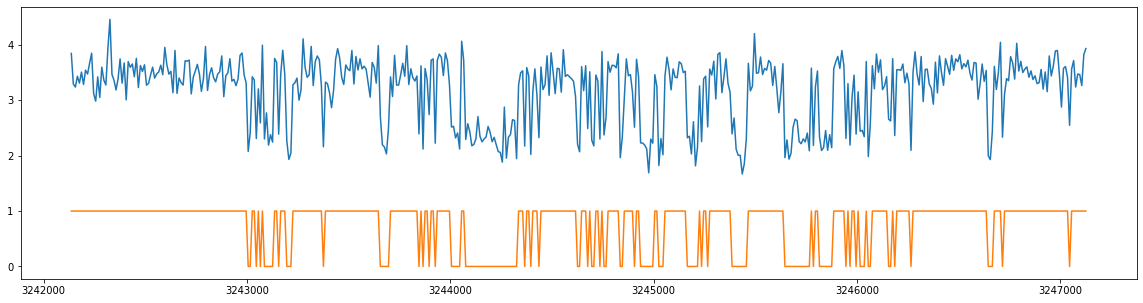

#########################
### Random 117897 to 122897
#########################


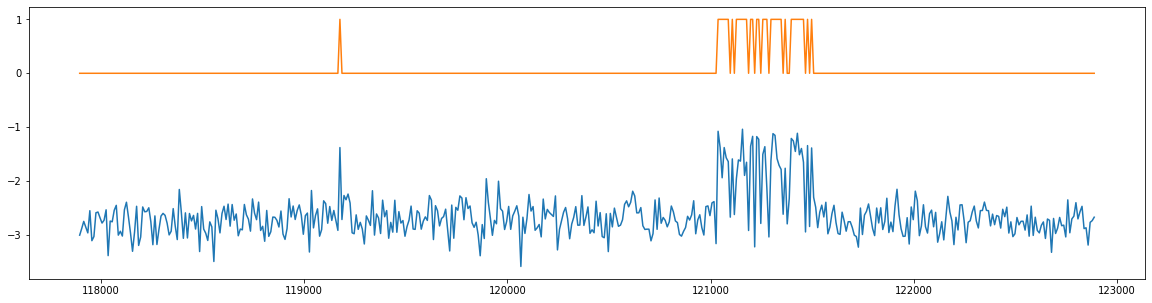

#########################
### Random 3186517 to 3191517
#########################


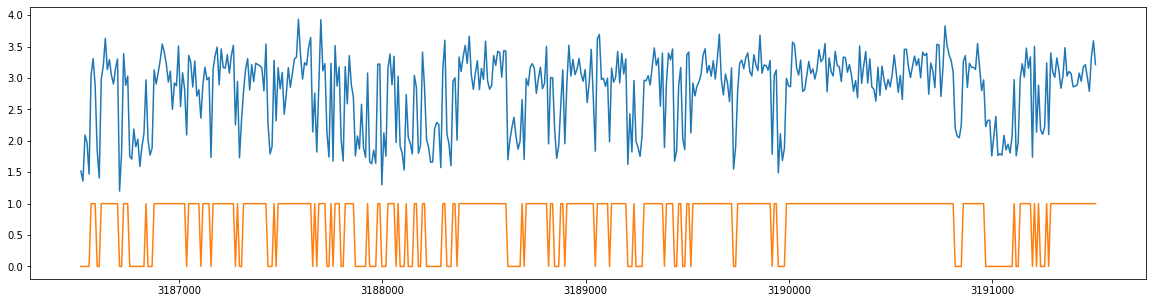

#########################
### Random 3640629 to 3645629
#########################


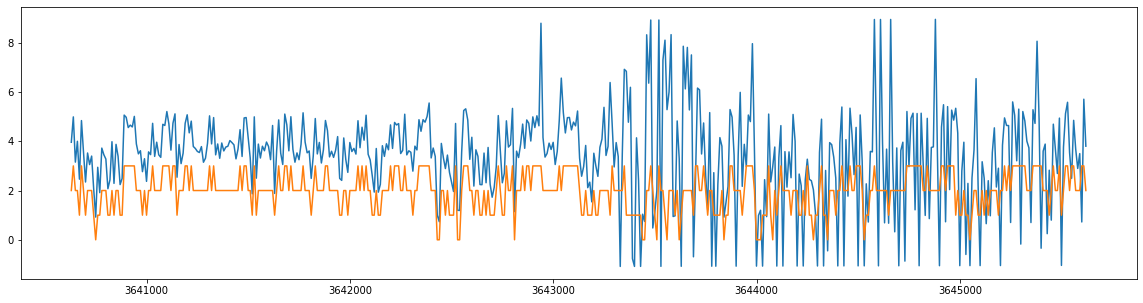

#########################
### Random 1786955 to 1791955
#########################


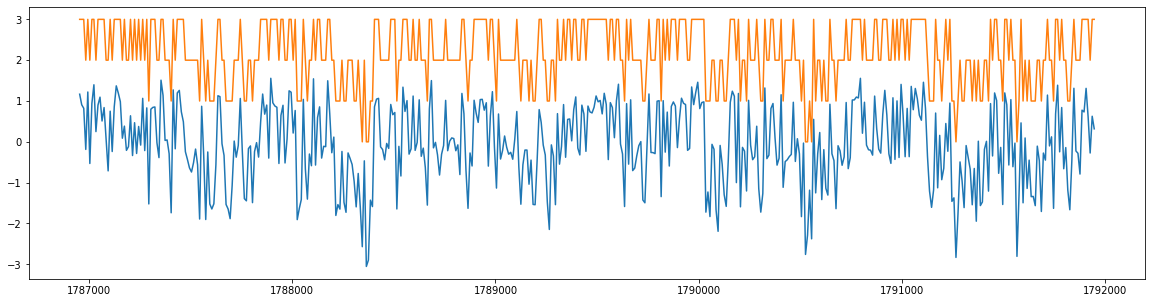

#########################
### Random 2302579 to 2307579
#########################


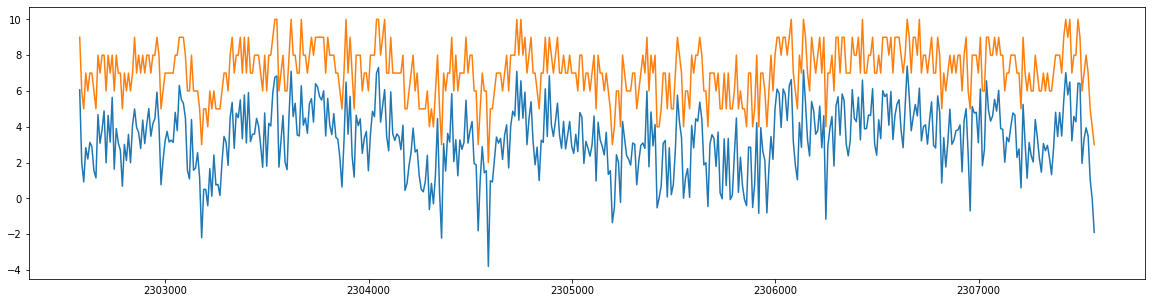

#########################
### Random 747731 to 752731
#########################


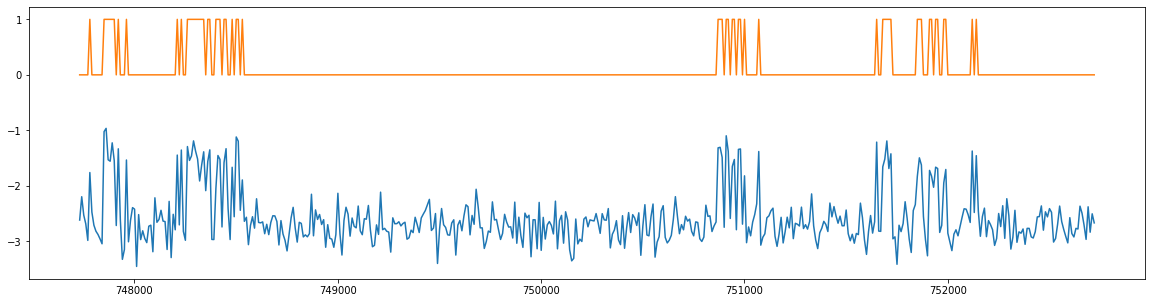

In [6]:
for k in range(10):
    a = int( np.random.uniform(0,train.shape[0]-50000) )
    b=a+5000; res=10
    print('#'*25)
    print('### Random %i to %i'%(a,b))
    print('#'*25)
    plt.figure(figsize=(20,5))
    plt.plot(range(a,b,res),train.signal[a:b][0::res])
    plt.plot(range(a,b,res),train.open_channels[a:b][0::res])
    plt.show()

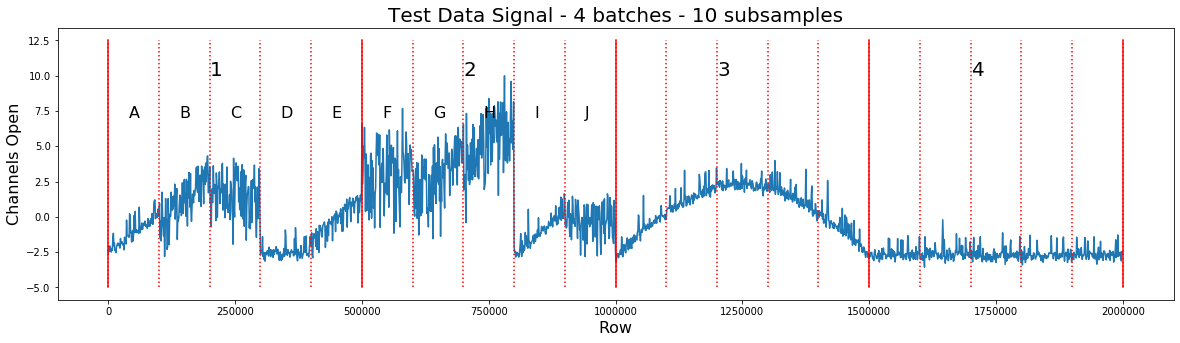

In [7]:
plt.figure(figsize=(20,5))
res = 1000; let = ['A','B','C','D','E','F','G','H','I','J']
plt.plot(range(0,test.shape[0],res),test.signal[0::res])
for i in range(5): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(21): plt.plot([j*100000,j*100000],[-5,12.5],'r:')
for k in range(4): plt.text(k*500000+200000,10,str(k+1),size=20)
for k in range(10): plt.text(k*100000+40000,7,let[k],size=16)
plt.xlabel('Row',size=16); plt.ylabel('Channels Open',size=16); 
plt.title('Test Data Signal - 4 batches - 10 subsamples',size=20)
plt.show()

In [8]:
train2 = train.copy()

a=500000; b=600000 # CLEAN TRAIN BATCH 2
train2.loc[train.index[a:b],'signal'] = train2.signal[a:b].values - 3*(train2.time.values[a:b] - 50)/10.

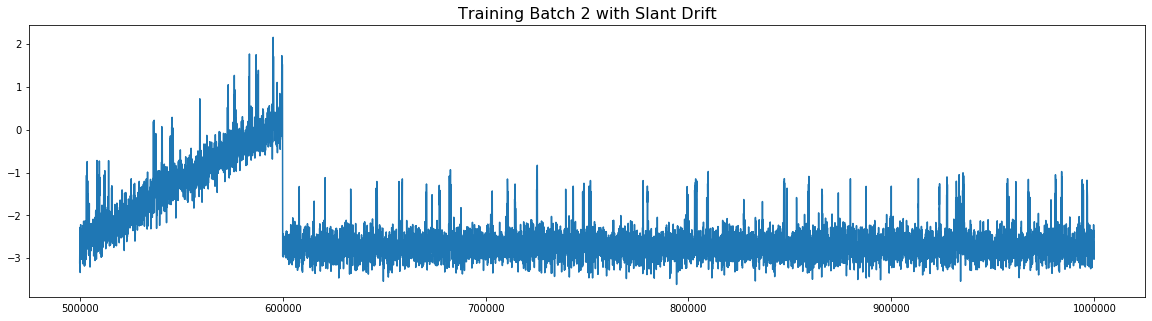

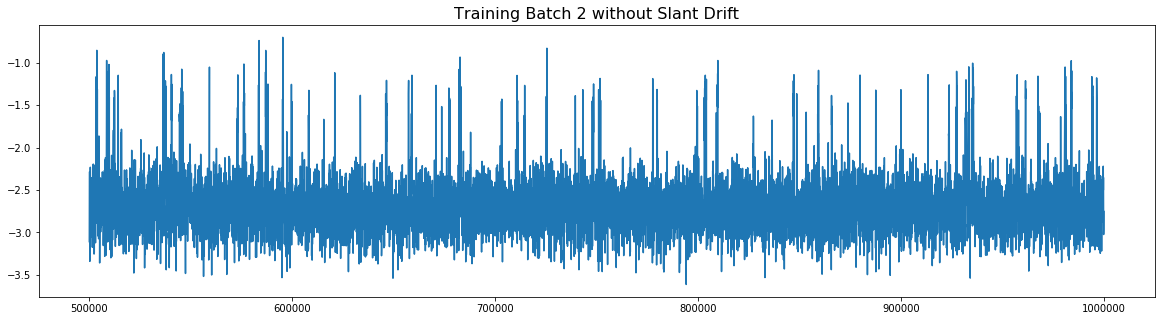

In [9]:
batch=2; a=500000*(batch-1); b=500000*batch; res=50
plt.figure(figsize=(20,5))
plt.plot(range(a,b,res),train.signal[a:b][0::res])
plt.title('Training Batch 2 with Slant Drift',size=16)
plt.figure(figsize=(20,5))
plt.plot(range(a,b,res),train2.signal[a:b][0::res])
plt.title('Training Batch 2 without Slant Drift',size=16)
plt.show()

In [10]:
def f(x,low,high,mid): return -((-low+high)/625)*(x-mid)**2+high -low

# CLEAN TRAIN BATCH 7
batch = 7; a = 500000*(batch-1); b = 500000*batch
train2.loc[train2.index[a:b],'signal'] = train.signal.values[a:b] - f(train.time[a:b].values,-1.817,3.186,325)
# CLEAN TRAIN BATCH 8
batch = 8; a = 500000*(batch-1); b = 500000*batch
train2.loc[train2.index[a:b],'signal'] = train.signal.values[a:b] - f(train.time[a:b].values,-0.094,4.936,375)
# CLEAN TRAIN BATCH 9
batch = 9; a = 500000*(batch-1); b = 500000*batch
train2.loc[train2.index[a:b],'signal'] = train.signal.values[a:b] - f(train.time[a:b].values,1.715,6.689,425)
# CLEAN TRAIN BATCH 10
batch = 10; a = 500000*(batch-1); b = 500000*batch
train2.loc[train2.index[a:b],'signal'] = train.signal.values[a:b] - f(train.time[a:b].values,3.361,8.45,475)

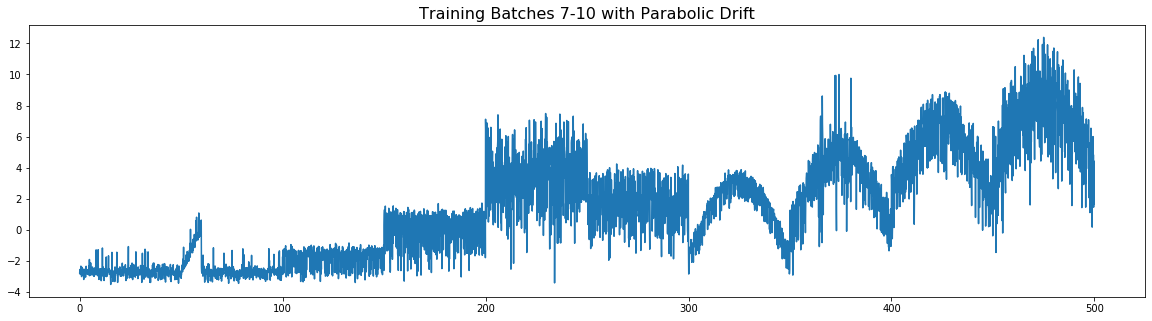

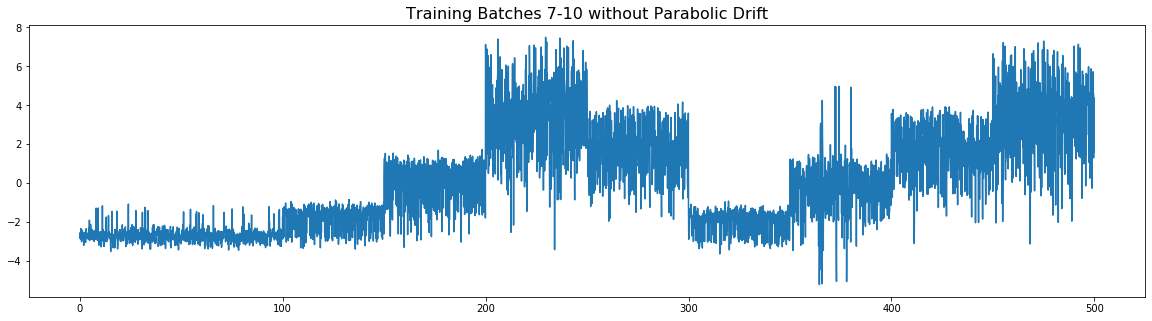

In [11]:
plt.figure(figsize=(20,5))
plt.plot(train.time[::1000],train.signal[::1000])
plt.title('Training Batches 7-10 with Parabolic Drift',size=16)
plt.figure(figsize=(20,5))
plt.plot(train2.time[::1000],train2.signal[::1000])
plt.title('Training Batches 7-10 without Parabolic Drift',size=16)
plt.show()

Training model 1s channel
has f1 validation score = 0.984750462652431


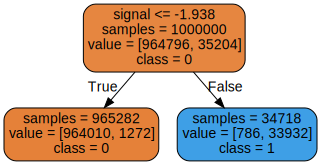

In [12]:
batch = 1; a = 500000*(batch-1); b = 500000*batch
batch = 2; c = 500000*(batch-1); d = 500000*batch
X_train = np.concatenate([train2.signal.values[a:b],train2.signal.values[c:d]]).reshape((-1,1))
y_train = np.concatenate([train2.open_channels.values[a:b],train2.open_channels.values[c:d]]).reshape((-1,1))

clf1s = tree.DecisionTreeClassifier(max_depth=1)
clf1s = clf1s.fit(X_train,y_train)
print('Training model 1s channel')
preds = clf1s.predict(X_train)
print('has f1 validation score =',f1_score(y_train,preds,average='macro'))

tree_graph = tree.export_graphviz(clf1s, out_file=None, max_depth = 10,
    impurity = False, feature_names = ['signal'], class_names = ['0', '1'],
    rounded = True, filled= True )
graphviz.Source(tree_graph)  

Training model 1f channel
has f1 validation score = 0.9879287335590583


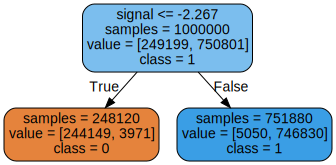

In [13]:
batch = 3; a = 500000*(batch-1); b = 500000*batch
batch = 7; c = 500000*(batch-1); d = 500000*batch
X_train = np.concatenate([train2.signal.values[a:b],train2.signal.values[c:d]]).reshape((-1,1))
y_train = np.concatenate([train2.open_channels.values[a:b],train2.open_channels.values[c:d]]).reshape((-1,1))

clf1f = tree.DecisionTreeClassifier(max_depth=1)
clf1f = clf1f.fit(X_train, y_train)
print('Training model 1f channel')
preds = clf1f.predict(X_train)
print('has f1 validation score =',f1_score(y_train,preds,average='macro'))

tree_graph = tree.export_graphviz(clf1f, out_file=None, max_depth = 10,
    impurity = False, feature_names = ['signal'], class_names = ['0', '1'],
    rounded = True, filled= True )
graphviz.Source(tree_graph) 

Training model 3 channel
has f1 validation score = 0.9321291153218245


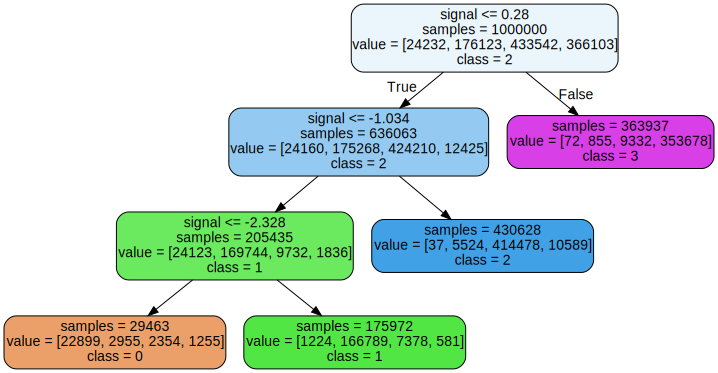

In [14]:
batch = 4; a = 500000*(batch-1); b = 500000*batch
batch = 8; c = 500000*(batch-1); d = 500000*batch
X_train = np.concatenate([train2.signal.values[a:b],train2.signal.values[c:d]]).reshape((-1,1))
y_train = np.concatenate([train2.open_channels.values[a:b],train2.open_channels.values[c:d]]).reshape((-1,1))

clf3 = tree.DecisionTreeClassifier(max_leaf_nodes=4)
clf3 = clf3.fit(X_train,y_train)
print('Training model 3 channel')
preds = clf3.predict(X_train)
print('has f1 validation score =',f1_score(y_train,preds,average='macro'))

tree_graph = tree.export_graphviz(clf3, out_file=None, max_depth = 10,
    impurity = False, feature_names = ['signal'], class_names = ['0', '1','2','3'],
    rounded = True, filled= True )
graphviz.Source(tree_graph) 

Trained model 5 channel
has f1 validation score = 0.9538294064086686


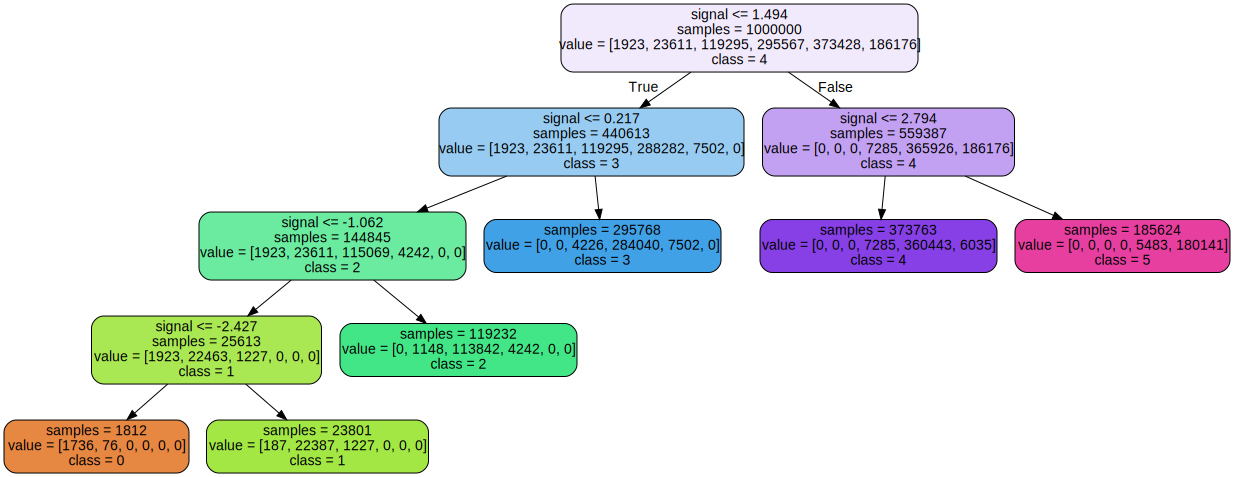

In [15]:
batch = 6; a = 500000*(batch-1); b = 500000*batch
batch = 9; c = 500000*(batch-1); d = 500000*batch
X_train = np.concatenate([train2.signal.values[a:b],train2.signal.values[c:d]]).reshape((-1,1))
y_train = np.concatenate([train2.open_channels.values[a:b],train2.open_channels.values[c:d]]).reshape((-1,1))

clf5 = tree.DecisionTreeClassifier(max_leaf_nodes=6)
clf5 = clf5.fit(X_train, y_train)
print('Trained model 5 channel')
preds = clf5.predict(X_train)
print('has f1 validation score =',f1_score(y_train,preds,average='macro'))

tree_graph = tree.export_graphviz(clf5, out_file=None, max_depth = 10,
    impurity = False, feature_names = ['signal'], class_names = ['0', '1','2','3','4','5'],
    rounded = True, filled= True )
graphviz.Source(tree_graph) 

Trained model 10 channel
has f1 validation score = 0.617082087312885


/home/renoip/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


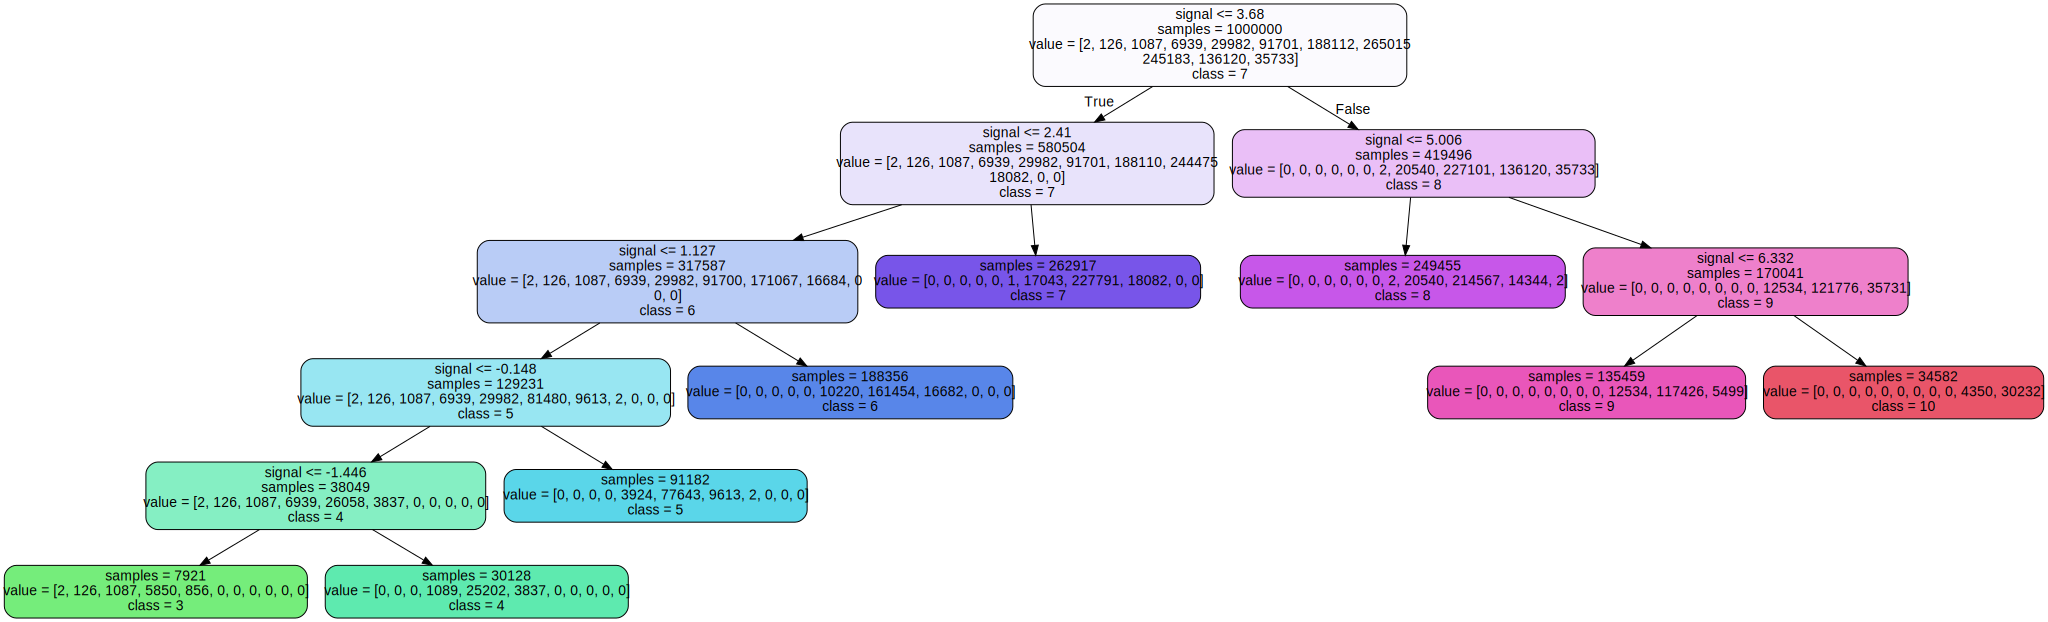

In [16]:
batch = 5; a = 500000*(batch-1); b = 500000*batch
batch = 10; c = 500000*(batch-1); d = 500000*batch
X_train = np.concatenate([train2.signal.values[a:b],train2.signal.values[c:d]]).reshape((-1,1))
y_train = np.concatenate([train2.open_channels.values[a:b],train2.open_channels.values[c:d]]).reshape((-1,1))

clf10 = tree.DecisionTreeClassifier(max_leaf_nodes=8)
clf10 = clf10.fit(X_train, y_train)
print('Trained model 10 channel')
preds = clf10.predict(X_train)
print('has f1 validation score =',f1_score(y_train,preds,average='macro'))

tree_graph = tree.export_graphviz(clf10, out_file=None, max_depth = 10,
    impurity = False, feature_names = ['signal'], class_names = [str(x) for x in range(11)],
    rounded = True, filled= True )
graphviz.Source(tree_graph) 

In [17]:
test2 = test.copy()

In [18]:
# REMOVE BATCH 1 DRIFT
start=500
a = 0; b = 100000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - 3*(test2.time.values[a:b]-start)/10.
start=510
a = 100000; b = 200000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - 3*(test2.time.values[a:b]-start)/10.
start=540
a = 400000; b = 500000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - 3*(test2.time.values[a:b]-start)/10.

In [19]:
# REMOVE BATCH 2 DRIFT
start=560
a = 600000; b = 700000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - 3*(test2.time.values[a:b]-start)/10.
start=570
a = 700000; b = 800000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - 3*(test2.time.values[a:b]-start)/10.
start=580
a = 800000; b = 900000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - 3*(test2.time.values[a:b]-start)/10.

In [20]:
# REMOVE BATCH 3 DRIFT
def f(x):
    return -(0.00788)*(x-625)**2+2.345 +2.58
a = 1000000; b = 1500000
test2.loc[test2.index[a:b],'signal'] = test2.signal.values[a:b] - f(test2.time[a:b].values)

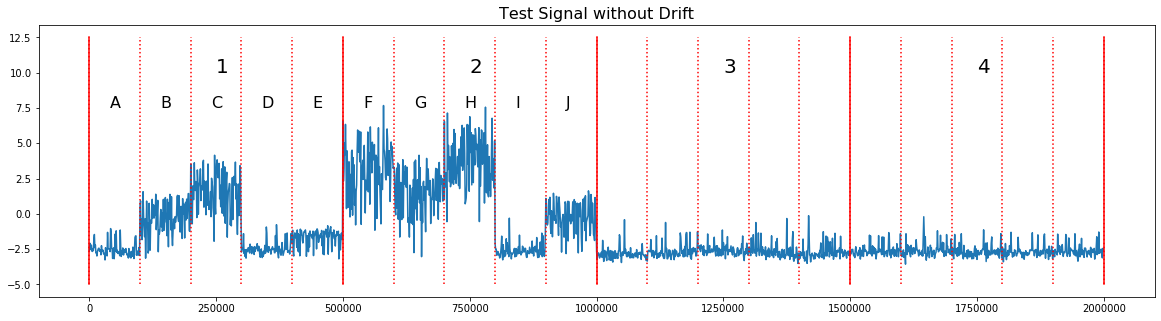

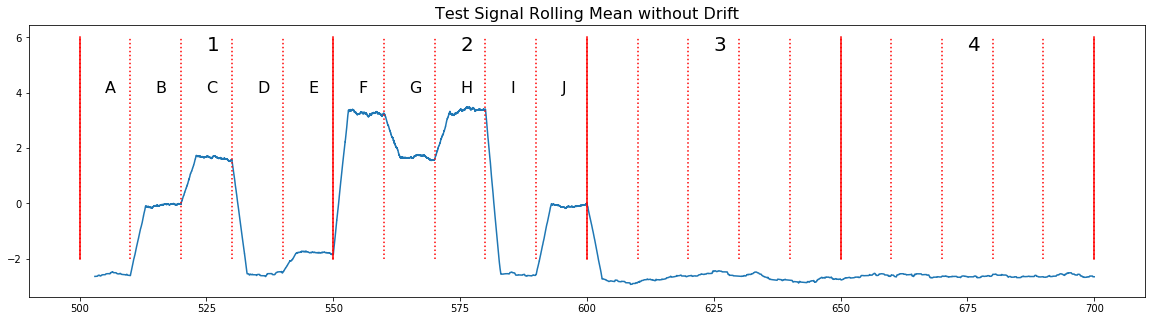

In [21]:
plt.figure(figsize=(20,5))
res = 1000
plt.plot(range(0,test2.shape[0],res),test2.signal[0::res])
for i in range(5): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for i in range(21): plt.plot([i*100000,i*100000],[-5,12.5],'r:')
for k in range(4): plt.text(k*500000+250000,10,str(k+1),size=20)
for k in range(10): plt.text(k*100000+40000,7.5,let[k],size=16)
plt.title('Test Signal without Drift',size=16)
plt.show()

plt.figure(figsize=(20,5))
r = test2.signal.rolling(30000).mean()
plt.plot(test2.time.values,r)
for i in range(21): plt.plot([500+i*10,500+i*10],[-2,6],'r:')
for i in range(5): plt.plot([500+i*50,500+i*50],[-2,6],'r')
for k in range(4): plt.text(525+k*50,5.5,str(k+1),size=20)
for k in range(10): plt.text(505+k*10,4,let[k],size=16)
plt.title('Test Signal Rolling Mean without Drift',size=16)
plt.show()

In [22]:
sub = pd.read_csv('sample_submission.csv')

a = 0 # SUBSAMPLE A, Model 1s
sub.iloc[100000*a:100000*(a+1),1] = clf1s.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 1 # SUBSAMPLE B, Model 3
sub.iloc[100000*a:100000*(a+1),1] = clf3.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 2 # SUBSAMPLE C, Model 5
sub.iloc[100000*a:100000*(a+1),1] = clf5.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 3 # SUBSAMPLE D, Model 1s
sub.iloc[100000*a:100000*(a+1),1] = clf1s.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 4 # SUBSAMPLE E, Model 1f
sub.iloc[100000*a:100000*(a+1),1] = clf1f.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 5 # SUBSAMPLE F, Model 10
sub.iloc[100000*a:100000*(a+1),1] = clf10.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 6 # SUBSAMPLE G, Model 5
sub.iloc[100000*a:100000*(a+1),1] = clf5.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 7 # SUBSAMPLE H, Model 10
sub.iloc[100000*a:100000*(a+1),1] = clf10.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 8 # SUBSAMPLE I, Model 1s
sub.iloc[100000*a:100000*(a+1),1] = clf1s.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

a = 9 # SUBSAMPLE J, Model 3
sub.iloc[100000*a:100000*(a+1),1] = clf3.predict(test2.signal.values[100000*a:100000*(a+1)].reshape((-1,1)))

 # BATCHES 3 AND 4, Model 1s
sub.iloc[1000000:2000000,1] = clf1s.predict(test2.signal.values[1000000:2000000].reshape((-1,1)))

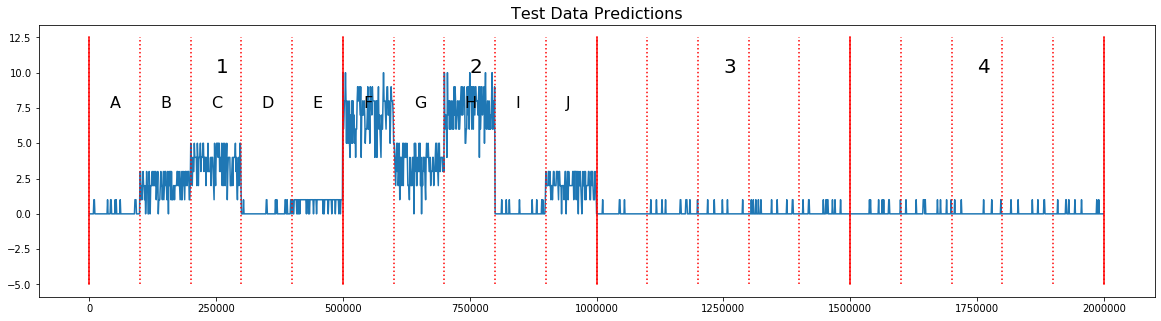

In [23]:
plt.figure(figsize=(20,5))
res = 1000
plt.plot(range(0,test.shape[0],res),sub.open_channels[0::res])
for i in range(5): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for i in range(21): plt.plot([i*100000,i*100000],[-5,12.5],'r:')
for k in range(4): plt.text(k*500000+250000,10,str(k+1),size=20)
for k in range(10): plt.text(k*100000+40000,7.5,let[k],size=16)
plt.title('Test Data Predictions',size=16)
plt.show()

In [24]:
sub.to_csv('submission.csv',index=False,float_format='%.4f')